In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
xTestData = np.genfromtxt("data/X_test.txt", delimiter = None, skip_header=1)
xTrainData = np.genfromtxt("data/X_train.txt", delimiter = None, skip_header=1)
yTrainData = np.genfromtxt("data/Y_train.txt", delimiter = None, skip_header=1)

In [3]:
xTrain, xVal, yTrain, yVal = train_test_split(xTrainData, yTrainData, test_size=0.25, shuffle = True)

In [4]:
yTrainDist = yTrain[:, 1]
yTrainZ = yTrain[:, 0]
yValDist = yVal[:,1]
yValZ = yVal[:,0]

xTestIds = xTestData[:,0]

#OverSampler
sm = SMOTE(random_state = 2)

#UnderSampler
nr = NearMiss()

In [5]:
def printScores(xTrain, yTrain, xVal):
    scale = StandardScaler().fit(xTrain)
    xTrainScaled = scale.transform(xTrain)
    xValScaled = scale.transform(xVal)

    kernelTypes = ["rbf", "linear", "poly", "sigmoid"]
    
    for kType in kernelTypes:
        svc = svm.SVC(kernel=kType, probability=True)
        svc.fit(xTrainScaled, yTrain.ravel())
        perc = "{:.2%}".format(svc.score(xValScaled, yValDist))
        yPred = svc.predict(xValScaled)
        print(kType + ": " + str(perc) + "\n" + str(classification_report(yValDist, yPred)) + "\n" + str(confusion_matrix(yValDist, yPred)) + "\n")

In [6]:
xTrainFirsts = xTrain[:,[1,2,3,4,11,18,22,29]]
xValFirsts = xVal[:,[1,2,3,4,11,18,22,29]]
xTestFirsts = xTestData[:,[1,2,3,4,11,18,22,29]]

In [7]:
# xTrainBal, yTrainBal = sm.fit_sample(xTrainFirsts, yTrainDist.ravel())

# printScores(xTrainBal, yTrainBal, xValFirsts)

In [22]:
xTrainFirstsP = xTrain[:,[1,2,3,11,22,26,32]]
xValFirstsP = xVal[:,[1,2,3,11,22,26,32]]
xTestFirstsP = xTestData[:,[1,2,3,11,22,26,32]]

In [23]:
xTrainBal, yTrainBal = sm.fit_sample(xTrainFirstsP, yTrainDist.ravel())

printScores(xTrainBal, yTrainBal, xValFirstsP)

rbf: 90.62%
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      1126
         1.0       0.35      0.72      0.47        68

    accuracy                           0.91      1194
   macro avg       0.66      0.82      0.71      1194
weighted avg       0.95      0.91      0.92      1194

[[1033   93]
 [  19   49]]

linear: 83.08%
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90      1126
         1.0       0.21      0.72      0.33        68

    accuracy                           0.83      1194
   macro avg       0.60      0.78      0.61      1194
weighted avg       0.94      0.83      0.87      1194

[[943 183]
 [ 19  49]]

poly: 85.59%
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      1126
         1.0       0.25      0.76      0.38        68

    accuracy                           0.86      1194
   macro avg       0.62      0.81   

In [51]:
xTrainImp = xTrain[:,[1,4,5,11,13,8,14,22,20,27]]
xValImp = xVal[:,[1,4,5,11,13,8,14,22,20,27]]
xTestImp = xTestData[:,[1,4,5,11,13,8,14,22,20,27]]

In [52]:
xTrainBal, yTrainBal = sm.fit_sample(xTrainImp, yTrainDist.ravel())

printScores(xTrainBal, yTrainBal, xValImp)

rbf: 93.97%
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1126
         1.0       0.48      0.93      0.64        68

    accuracy                           0.94      1194
   macro avg       0.74      0.93      0.80      1194
weighted avg       0.97      0.94      0.95      1194

[[1059   67]
 [   5   63]]

linear: 94.30%
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1126
         1.0       0.50      0.97      0.66        68

    accuracy                           0.94      1194
   macro avg       0.75      0.96      0.81      1194
weighted avg       0.97      0.94      0.95      1194

[[1060   66]
 [   2   66]]

poly: 94.39%
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1126
         1.0       0.50      0.76      0.61        68

    accuracy                           0.94      1194
   macro avg       0.75      0.8

In [57]:
xTrainBal, yTrainBal = sm.fit_sample(xTrainImp, yTrainDist.ravel())

scale = StandardScaler().fit(xTrainBal)
xTrainScaled = scale.transform(xTrainBal)
xTestScaled = scale.transform(xTestImp)

svc = svm.SVC(kernel="sigmoid", probability=True)
svc.fit(xTrainScaled, yTrainBal)
probs = svc.predict_proba(xTestScaled)
ids = xTestIds.tolist()
probs = probs.tolist()

f = open("SVCFixOverfit3.txt", "w+")
f.write("Unique Id,DIST\n")

for i in range(len(ids)):
    f.write(str(int(ids[i])) + "," + str(probs[i][1]) + "\n")
    
f.close()
print("printed!!!")

printed!!!


(4776, 34)
(4776,)
[0.03262446 0.00890592 0.02007327 0.04533448 0.04773892 0.01803306
 0.01574445 0.05063358 0.01670701 0.01861799 0.04820141 0.020625
 0.04926518 0.05279549 0.02716324 0.0104105  0.01546149 0.01477629
 0.01483137 0.08083314 0.02363701 0.06850893 0.01832662 0.01731119
 0.01606259 0.02317881 0.08944549 0.03071785 0.01322002 0.01961896
 0.01691441 0.01611012 0.01481757 0.02335419]


/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


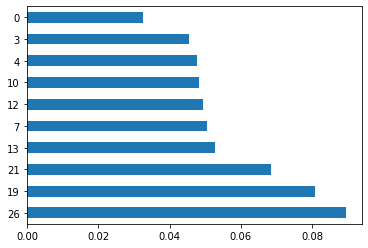

In [50]:
X = xTrainData[:,1:35]  #independent columns
print(X.shape)
y = yTrainData[:,1]    #target column i.e price range
print(y.shape)

scale = StandardScaler().fit(X)
xTrainScaled = scale.transform(X)

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(xTrainScaled,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()